In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [84]:
df = pd.read_csv(r"C:\Users\91630\Downloads\archive (10)\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [85]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [86]:
df = df.drop(columns=['Prediction_Result'], errors='ignore')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
fraud = train_df[train_df['Class'] == 1]
genuine = train_df[train_df['Class'] == 0].sample(n=len(fraud), random_state=42)
downsampled = pd.concat([fraud, genuine])

X_resampled = downsampled.drop('Class', axis=1)
y_resampled = downsampled['Class']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Genuine", "Fraudulent"]))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

     Genuine       1.00      0.97      0.98     56864
  Fraudulent       0.04      0.93      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962

 Confusion Matrix:
[[54909  1955]
 [    7    91]]
 Accuracy: 0.9656


In [87]:
X_resampled = downsampled.drop(columns=["Class", "Prediction_Result"], errors='ignore')
X_resampled = X_resampled.select_dtypes(include=[np.number])

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

X_predict = X.select_dtypes(include=[np.number]).copy()

X_predict = X_predict.drop(columns=["Class", "Prediction_Result"], errors="ignore")

predictions = clf.predict(X_predict)

df["Predicted_Class"] = predictions
df["Prediction_Result"] = df["Predicted_Class"].map({0: "Genuine", 1: "Fraudulent"})

print(df[["Predicted_Class", "Prediction_Result"]][50:70]) 


    Predicted_Class Prediction_Result
50                0           Genuine
51                1        Fraudulent
52                0           Genuine
53                0           Genuine
54                0           Genuine
55                0           Genuine
56                0           Genuine
57                0           Genuine
58                0           Genuine
59                0           Genuine
60                0           Genuine
61                0           Genuine
62                0           Genuine
63                0           Genuine
64                0           Genuine
65                0           Genuine
66                0           Genuine
67                0           Genuine
68                0           Genuine
69                1        Fraudulent


In [88]:
fraud_predictions = df[df["Predicted_Class"] == 1]
print(fraud_predictions)
print(f"\n Found {len(fraud_predictions)} predicted fraudulent transactions.")


            Time        V1        V2        V3        V4        V5        V6  \
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
69          46.0 -1.923213 -0.870482  2.320170  1.988776  0.417091 -0.380014   
102         69.0  0.298503  2.142722 -1.542143  1.561332  0.938108 -2.145673   
108         73.0  1.162281  1.248178 -1.581317  1.475024  1.138357 -1.020373   
150         93.0 -1.640014 -0.479831  1.613630  2.997979 -3.803788  5.051812   
...          ...       ...       ...       ...       ...       ...       ...   
284645  172638.0 -2.521887  1.720516 -0.890967  4.516690  0.103394  0.410173   
284662  172653.0 -0.294488  0.960361 -0.880661  0.946303  2.125940  0.052208   
284669  172662.0  1.881521  1.192582 -1.740006  3.960403  1.282432 -0.164267   
284758  172745.0  1.911377  1.220896 -1.665127  4.148798  1.029442 -0.727610   
284782  172767.0 -0.268061  2.540315 -1.400915  4.846661  0.639105  0.186479   

              V7        V8        V9  .

In [89]:
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Genuine", "Fraudulent"]))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")

 Classification Report:
              precision    recall  f1-score   support

     Genuine       1.00      0.97      0.98     56864
  Fraudulent       0.04      0.93      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962

 Confusion Matrix:
[[54909  1955]
 [    7    91]]
 Accuracy: 0.9656


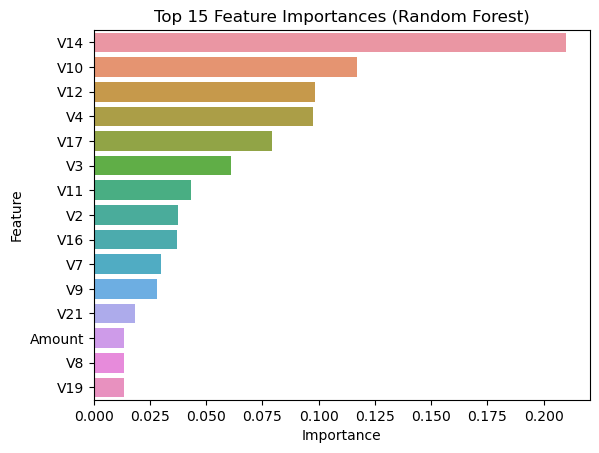

In [90]:
import pandas as pd

importances = clf.feature_importances_
features = X_resampled.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=importance_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


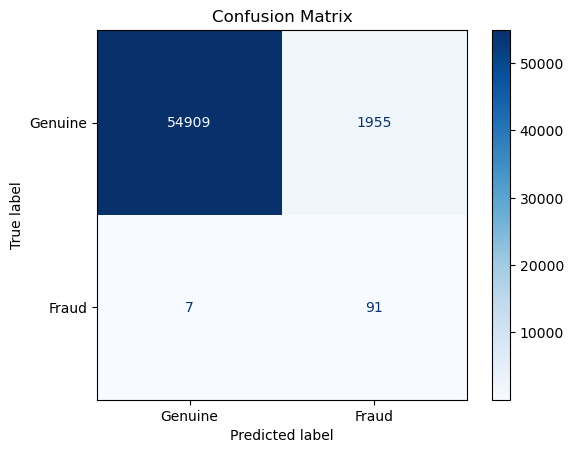

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Genuine", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


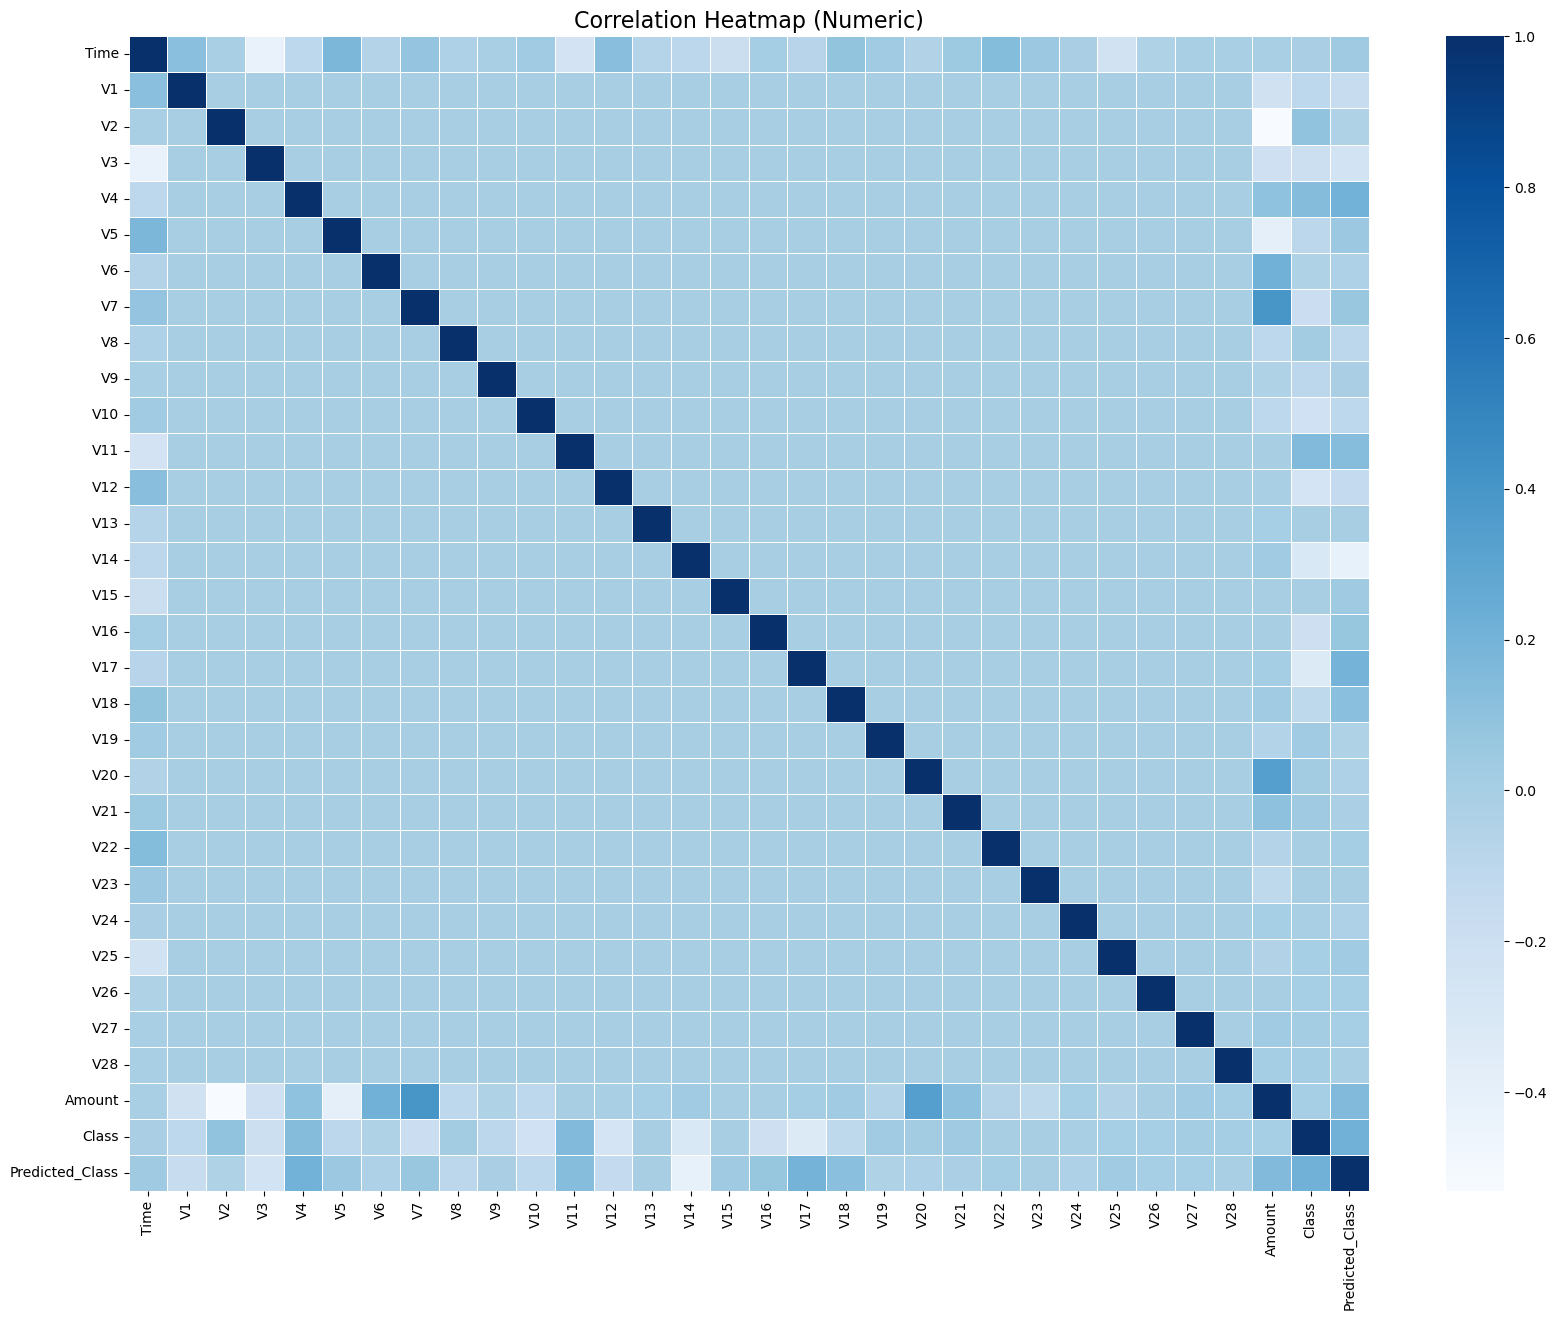

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="Blues", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric)", fontsize=16)
plt.show()


In [93]:
fraud_corr = corr_matrix["Class"].sort_values(ascending=False)

# Display top 10 positively/negatively correlated features
print(fraud_corr.head(10))
print(fraud_corr.tail(10))


Class              1.000000
Predicted_Class    0.215000
V11                0.154876
V4                 0.133447
V2                 0.091289
V21                0.040413
V19                0.034783
V20                0.020090
V8                 0.019875
V27                0.017580
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64
